# Linear Regression
X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas


In [4]:
! pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_91654/159856610.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [6]:
crime_df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


<Axes: >

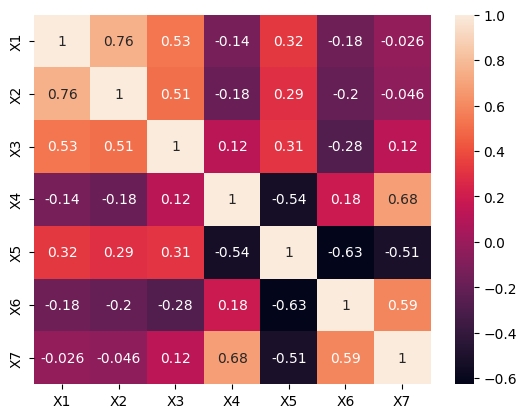

In [7]:
sns.heatmap(crime_df.corr(), annot=True)

In [8]:
crime_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [13]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5','X1']]

#x is what we are using to predict y
X = np.array(crime_df['X5']).reshape(-1,1)

#y is what we are predicting
y = np.array(crime_df['X1']).reshape(-1,1)

# 1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# 2. Create the model and fit and training data to it
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 3. predict new values using the test data
y_pred = regression_model.predict(X_test)
y_pred

array([[657.03984654],
       [683.63091813],
       [763.40413288],
       [816.58627605],
       [603.85770337],
       [803.29074026],
       [763.40413288],
       [630.44877496],
       [763.40413288],
       [710.22198971],
       [630.44877496],
       [630.44877496],
       [696.92645392],
       [603.85770337],
       [657.03984654]])

In [16]:
# r squared
accuracy_score = regression_model.score(X_test, y_test)

print(accuracy_score)

0.1324540151385344


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1324540151385344

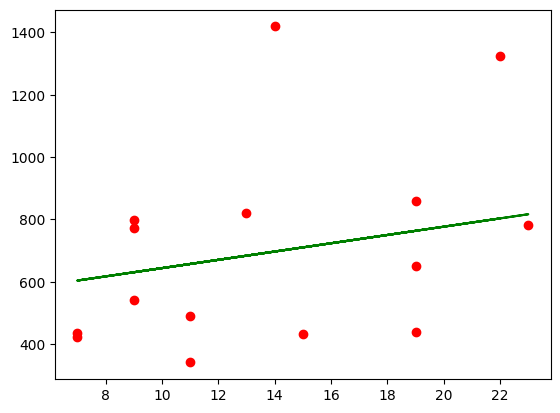

In [19]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color = 'g')

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


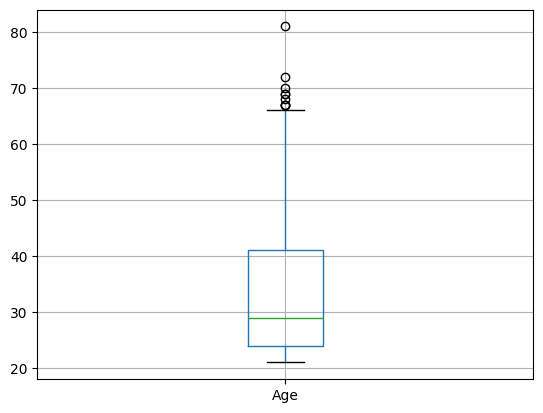

In [21]:
boxplot = diabetes_df.boxplot(column=['Age'], return_type='axes')

In [25]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize/normalize - transform the values so that the mean 
# is 0 and SD is 1
# we do this because then the model wont be impacted by large 
# numbers simply because theyre large. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))



[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]
<class 'numpy.ndarray'>


In [26]:
print(knn.score(X_test, y_test))

0.70995670995671


In [35]:
diabetes_pred_df = pd.DataFrame(X_test, columns=diabetes_df.columns[0:8])

diabetes_pred_df['Actual_Outcome'] = y_test.tolist()

diabetes_pred_df['Predicted_Outcome'] = y_pred.tolist()

diabetes_pred_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_Outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,1


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[123,  28],
       [ 39,  41]])

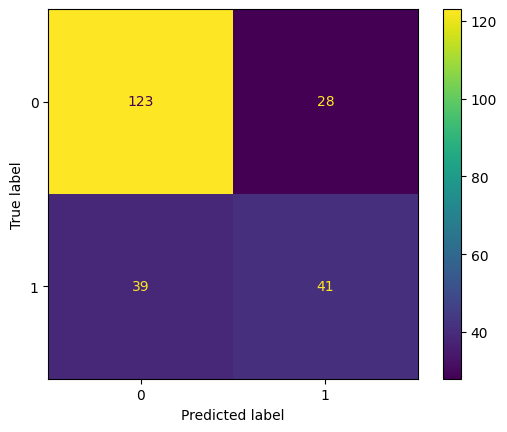

In [37]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)